In [13]:
import os, time
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from scipy.linalg import expm, eig, logm
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute, IBMQ
from quantum_circuit.trotterization import trotter_circuit
from operators.triangle_plaquette_hamiltonian import TrianglePlaquetteHamiltonian
from operators.pauli_hamiltonian import PauliHamiltonian
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
from qiskit.providers.jobstatus import JobStatus
from qiskit.visualization import plot_histogram


In [14]:
# Get on one of the IBM Q machines
IBMQ.load_account() # Load account from disk
print(IBMQ.providers())    # List all available providers
provider = IBMQ.get_provider(hub='ibm-q-ornl', project='brookhaven')
provider
provider.backends()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>]


[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_johannesburg') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='brookhaven')>,
 <IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-ornl', group='hep-qis', project='broo

In [15]:
# Specify the device
backend = provider.get_backend('ibmq_rochester')
print(backend)

ibmq_rochester


c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


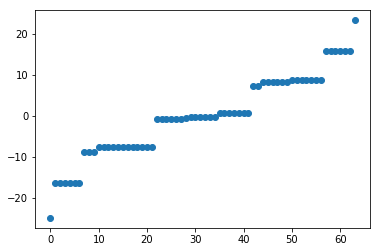

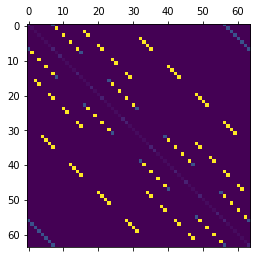

[ 2.48585813+1.38777878e-16j -0.61084713+1.80411242e-15j
  0.75      +1.77635684e-15j  0.22454493-9.57567359e-16j
  0.96681469+2.35922393e-15j -1.88274123+6.52256027e-16j
  0.96681469+2.94209102e-15j -2.46681469+2.05391260e-15j
 -2.46681469+2.49800181e-15j -2.46681469-2.49800181e-15j
 -3.01453163-1.87697080e-15j -0.25      -1.30104261e-15j
 -0.25      -1.55431223e-15j -3.01453163+4.08353906e-15j
 -0.25      +3.03923553e-15j -0.69707356-1.08246745e-15j
 -0.69707356+5.27355937e-16j -0.69707356+2.19269047e-15j
 -0.69707356+3.10862447e-15j -3.01453163-6.10622664e-16j
 -3.01453163+2.02962647e-15j -3.01453163-1.97758476e-16j
 -1.32112291+2.34187669e-15j -0.69707356+3.60822483e-15j
 -0.69707356+1.74860126e-15j -0.25      +1.21430643e-16j
 -0.25      +7.80625564e-16j -0.25      +6.55725474e-16j
 -1.32112291+2.84841595e-15j -3.01453163+7.87564458e-16j
  2.41388825+2.99760217e-15j -1.32112291+1.24553146e-15j
 -1.32112291-5.10008702e-16j -1.32112291+2.55698240e-15j
 -1.32112291+7.94503352e-16j  2

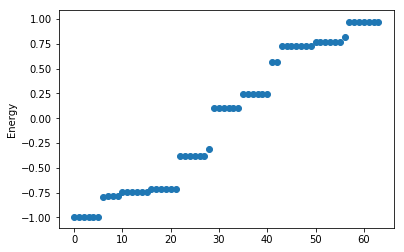

In [16]:
# 2 triangle plaquettes
T = 1
H = TrianglePlaquetteHamiltonian(0.5, 1, 2)
matH = H.matrix_form()
spectrum, _ = H.eigensystem()
plt.scatter(range(spectrum.shape[0]), np.sort(spectrum))
plt.show()
exact = expm(-1j*matH*T)
spectrum, _ = eig(exact)
plt.matshow(np.abs(matH))
plt.show()
print(np.log(spectrum)/(-1j))
plt.scatter(range(spectrum.shape[0]), np.sort(spectrum))
plt.ylabel("Energy")
plt.show()

In [17]:
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.h(qr[1])
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.measure(qr, cr)
qc.draw()

Running on device:  ibmq_rochester
Status @ 0 seconds
JobStatus.INITIALIZING
Status @ 30 seconds
JobStatus.QUEUED
Status @ 60 seconds
JobStatus.QUEUED
Status @ 90 seconds
JobStatus.QUEUED
Status @ 120 seconds
JobStatus.QUEUED
Status @ 150 seconds
JobStatus.QUEUED
Status @ 180 seconds
JobStatus.QUEUED
Status @ 210 seconds
JobStatus.RUNNING
Status @ 240 seconds
JobStatus.RUNNING
JobStatus.DONE
experiment:  Result(backend_name='ibmq_rochester', backend_version='1.1.1', date=datetime.datetime(2019, 11, 19, 9, 1, 42, tzinfo=tzutc()), execution_id='206e41b6-0aab-11ea-8ab2-801844ea2f44', header=Obj(backend_name='ibmq_rochester', backend_version='1.1.1'), job_id='5dd3ae818a690300130dc7f1', qobj_id='222865f8-f1f3-46e4-97c4-8e4a8fa9ccb5', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=114, 0x1=339, 0x2=497, 0x3=74)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=53, name='circuit0', qreg_sizes=[['q', 53]], qubit_labels=[['q',

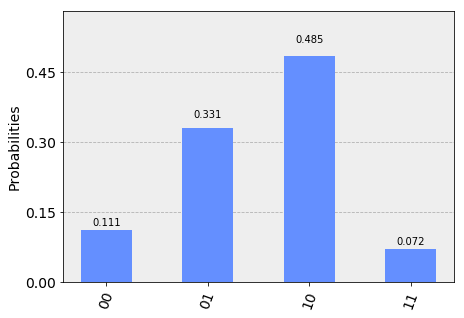

In [18]:
print("Running on device: ", backend)

# Compile and execute the Quantum circuit on the quantum computer
job_exp = execute(qc, backend, shots=1024, max_credits=10)
lapse = 0
interval = 30
while job_exp.status() != JobStatus.DONE:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status())
    time.sleep(interval)
    lapse += 1
print(job_exp.status())
result = job_exp.result()


# Render the output in the notebook user interface
print("experiment: ", result)
result_counts = result.get_counts(qc)
print(result_counts)
plot_histogram(result_counts)

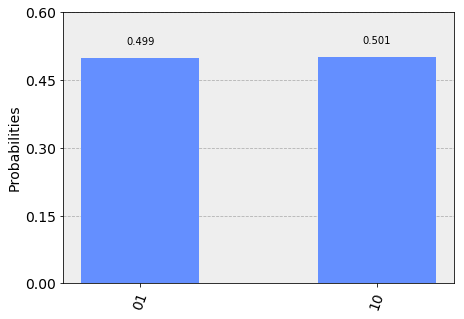

In [24]:
simulator = BasicAer.get_backend('qasm_simulator')
job_sim = execute(qc, simulator, shots=1024)
# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
plot_histogram(counts)

In [11]:
# Measure distances with the two distribution
def KL(p1, p2):
    """
    Compute the D_KL(p1||p2)
    """
    return np.sum(np.where(p1 != 0, p1 * np.log(p1 / p2), 0))

def H(p):
    """
    Compute Shannon entropy of p
    """
    return -np.sum(np.where(p1 != 0, p1 * np.log(p1), 0))
p1 = np.array([0, 0.5, 0.5, 0]) # Ideally we are expected to observe 50% 01 and 50% 10
p2 = np.array([0.103, 0.498, 0.355, 0.044])
print(KL(p1, p2))
print(H(p1))

0.17324916517215744
0.6931471805599453


c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
